# Start Here

This is a basic Tidy3D script showing the FDTD simulation of a delectric cube in the presence of a point dipole.

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pylab as plt

import tidy3d as td
import tidy3d.web as web

Using Tidy3D credentials from stored file


In [2]:
# set up parameters of simulation
dl=0.01
pml = td.PML(num_layers=10)
sim_size = [4, 4, 4]
lambda0 = 1.0
freq0 = td.C_0 / lambda0
fwidth = freq0 / 10.0
run_time = 10.0 / fwidth

# create structure
dielectric = td.Medium.from_nk(n=2, k=0, freq=freq0)
square = td.Structure(
    geometry=td.Box(center=[0, 0, 0], size=[1.5, 1.5, 1.5]),
    medium=dielectric)

# create source
source = td.VolumeSource(
    center=(-1.5, 0, 0),
    size=(0, 0.4, 0.4),
    source_time = td.GaussianPulse(
        freq0=freq0,
        fwidth=fwidth),
    polarization='Ey')

# create monitor
monitor = td.FieldMonitor(
    fields=['Ex', 'Ey', 'Hz'],
    center=(0, 0, 0),
    size=(td.inf, td.inf, 0),
    freqs=[freq0],
    name='field')

# Initialize simulation
sim = td.Simulation(size=sim_size,
                    grid_size=(dl, dl, dl),
                    structures=[square],
                    sources=[source],
                    monitors=[monitor],
                    run_time=run_time,
                    pml_layers=(pml, pml, pml))

In [3]:
data = web.run(sim, task_name='quickstart', path='data/data.hdf5')

[20:06:16] INFO     Uploaded task 'quickstart' with task_id                     ]8;id=241185;file://../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=410578;file://../../tidy3d/tidy3d/web/webapi.py#109\109]8;;\
                    '075b5ad2-b6c8-453d-89e7-26850d356e34'.

Output()

[20:06:18] status = queued                                                      ]8;id=642953;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=827462;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#201\201]8;;\

[20:06:48] status = preprocess                                                  ]8;id=237800;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=478120;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#201\201]8;;\

[20:07:15] status = running                                                     ]8;id=269431;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=50334;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#201\201]8;;\

[20:14:31] status = postprocess                                                 ]8;id=68077;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=257000;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#201\201]8;;\

[20:15:00] status = success                                                     ]8;id=374234;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=620709;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#201\201]8;;\

[20:15:01] INFO     downloading file "monitor_data.hdf5" to "data/data.hdf5"    ]8;id=416478;file://../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=937035;file://../../tidy3d/tidy3d/web/webapi.py#476\476]8;;\

Output()

Downloading... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00

[20:15:12] INFO     loading SimulationData from data/data.hdf5                  ]8;id=521794;file://../../tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=949162;file://../../tidy3d/tidy3d/web/webapi.py#306\306]8;;\

In [4]:
print(data.log)

Simulation domain Nx, Ny, Nz: [420, 420, 420]
Applied symmetries: (0, 0, 0)
Number of computational grid points: 7.4088e+07.
Using subpixel averaging: True
Number of time steps: 1.9247e+04
Automatic shutoff factor: 1.00e-05
Time step (s): 1.7332e-17
Compute source modes time (s):     0.0761
Compute monitor modes time (s):    0.0429

Rest of setup time (s):            0.2754

Starting solver...
- Time step    769 / time 1.33e-14s (  4 % done), field decay: 1.00e+00
- Time step   1531 / time 2.65e-14s (  7 % done), field decay: 1.00e+00
- Time step   1539 / time 2.67e-14s (  8 % done), field decay: 1.00e+00
- Time step   2309 / time 4.00e-14s ( 12 % done), field decay: 2.52e-01
- Time step   3079 / time 5.34e-14s ( 16 % done), field decay: 6.69e-02
- Time step   3849 / time 6.67e-14s ( 20 % done), field decay: 2.67e-02
- Time step   4619 / time 8.01e-14s ( 24 % done), field decay: 1.17e-02
- Time step   5389 / time 9.34e-14s ( 28 % done), field decay: 9.21e-03
- Time step   6159 / time 1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


<AxesSubplot:title={'center':'z = 0.0 [um], f = 2.998e+14 [Hz]'}, xlabel='x position [um]', ylabel='y position [um]'>

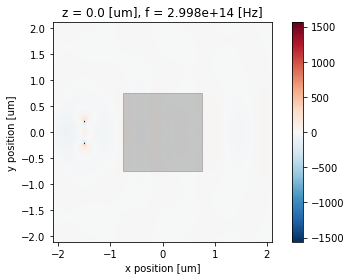

In [5]:
data.plot_field('field', 'Ey', freq=freq0, z=0)